## Import Packages and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 

## Load Data

In [2]:
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])

In [3]:
file_names = glob.glob("../Parkes_archive_files/4500nsub/*Fp.pdv")
file_names=sorted(file_names)

In [4]:
file_names

['../Parkes_archive_files/4500nsub\\2019-11-20-04\uf03a57\uf03a57.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-04\uf03a59\uf03a47.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a01\uf03a37.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a03\uf03a27.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a05\uf03a18.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a07\uf03a08.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a08\uf03a58.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a10\uf03a48.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a12\uf03a38.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a14\uf03a28.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a16\uf03a18.paz.pazi.Fp.pdv',
 '../Parkes_archive_files/4500nsub\\2019-11-20-05\uf03a18\uf03a09.paz.pazi.F

In [5]:
mode_class = np.loadtxt(fname='mode_doc_3.csv', delimiter=',', dtype=modedatatype)

### Checking through an entire file

In [19]:
lj=0

In [44]:
a=0

File: 0 ../Parkes_archive_files/4500nsub\2019-11-20-045757.paz.pazi.Fp.pdv


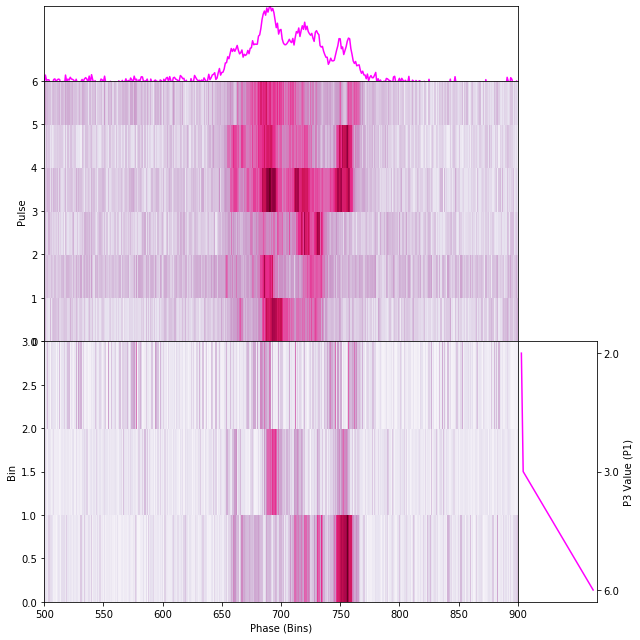

(0, 25, 30, 6, 'C')
The P3 value occurs in bin: 1
The P3 value is: 6.0 P1


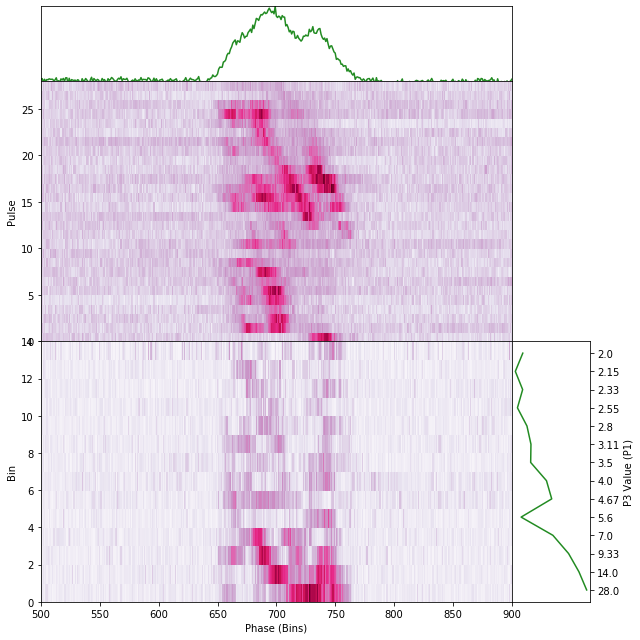

(0, 51, 78, 28, 'B')
The P3 value occurs in bin: 1
The P3 value is: 28.0 P1


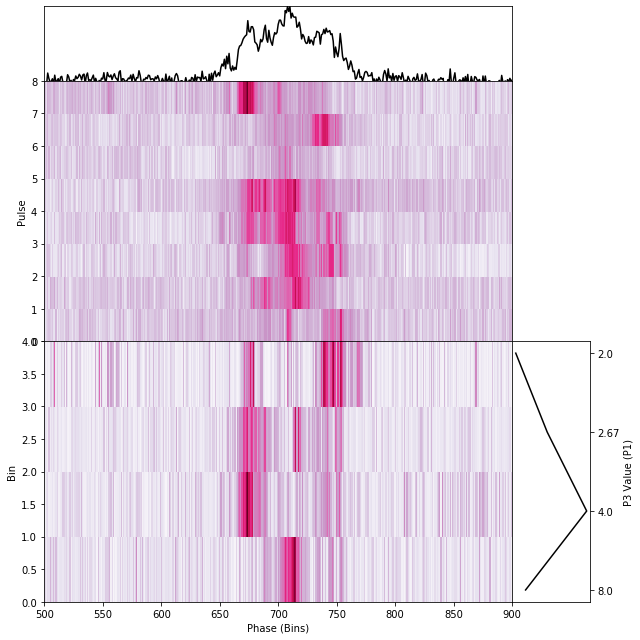

(0, 116, 123, 8, 'U')
The P3 value occurs in bin: 2
The P3 value is: 4.0 P1


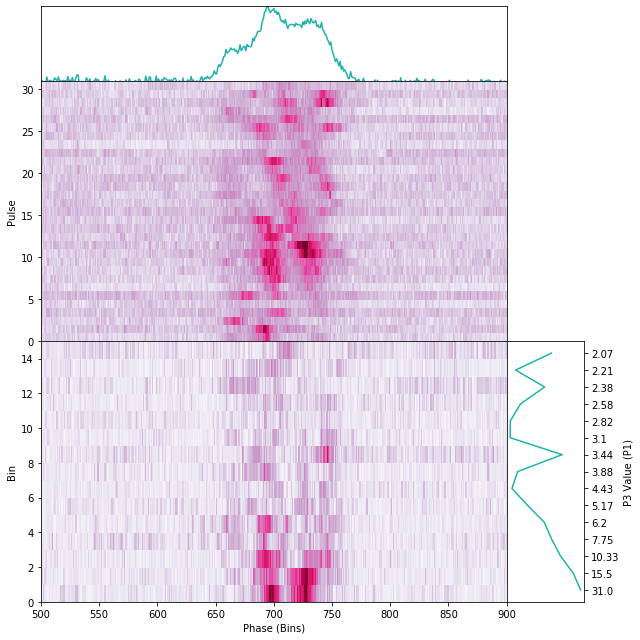

(0, 132, 162, 31, 'A')
The P3 value occurs in bin: 1
The P3 value is: 31.0 P1


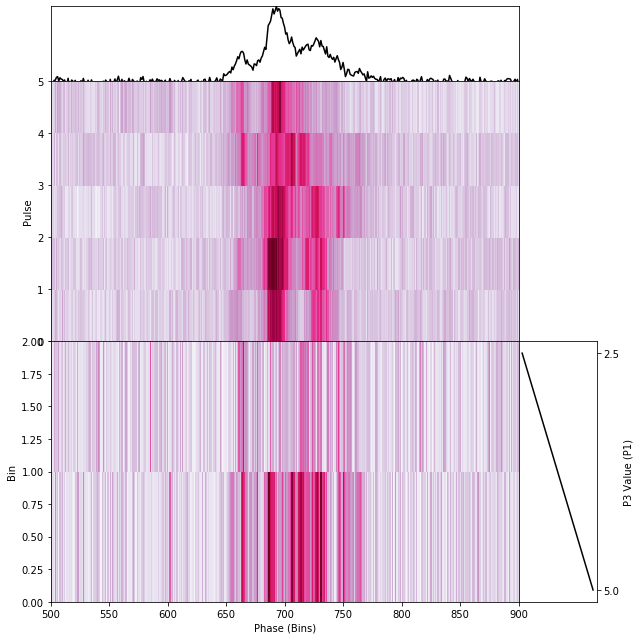

(0, 189, 193, 5, 'U')
The P3 value occurs in bin: 1
The P3 value is: 5.0 P1


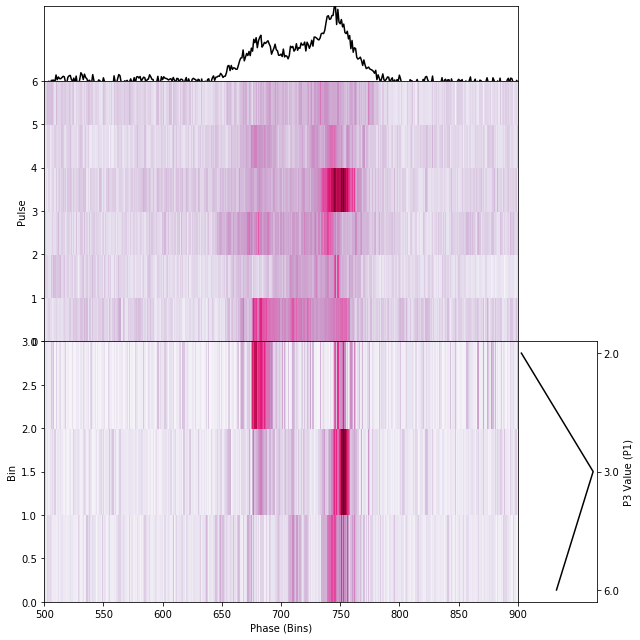

(0, 212, 217, 6, 'U')
The P3 value occurs in bin: 2
The P3 value is: 3.0 P1


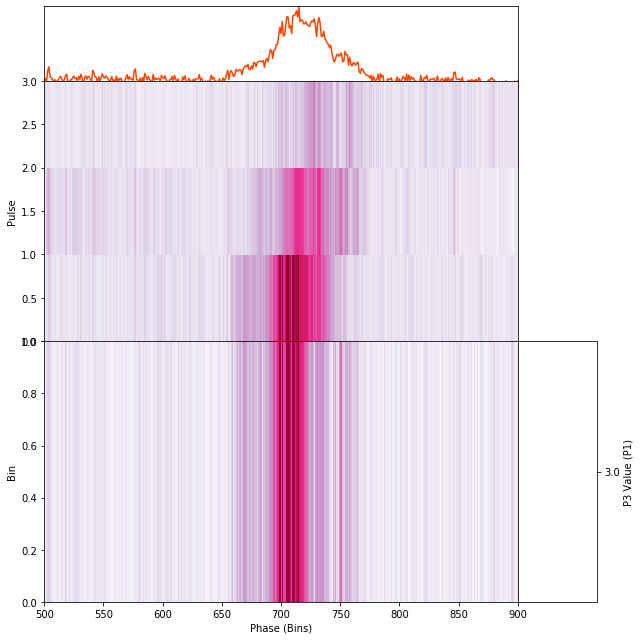

(0, 225, 227, 3, 'D')
The P3 value occurs in bin: 1
The P3 value is: 3.0 P1


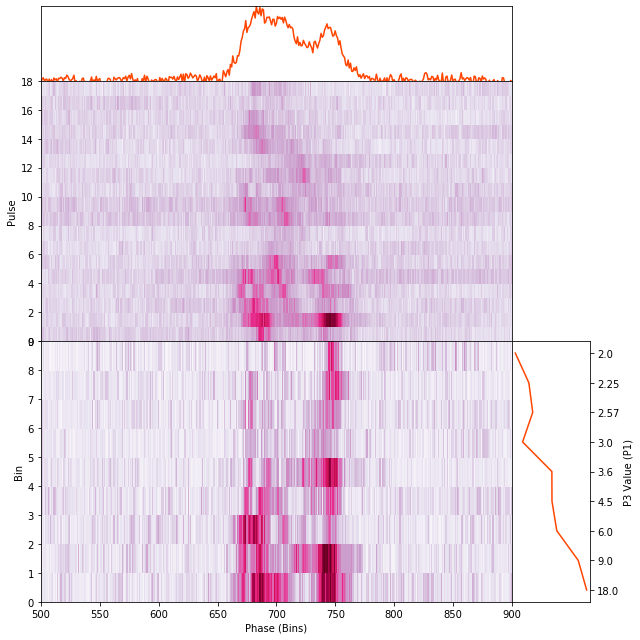

(0, 229, 246, 18, 'D')
The P3 value occurs in bin: 1
The P3 value is: 18.0 P1


In [45]:
ave_burst =[] 
ave_b=0
ave_lrfs =[]
ave_l=0

#Load in a file at a time
print('File:', a , file_names[a])
current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

f = mode_class['file'] == a
    
n = mode_class['mode'] != 'N'
p = np.logical_and(f,n)
bursts = mode_class[p]
    
for s_burst in bursts:
    burst_data=[]
    lrfs_data_T=[]
    ave_burst =np.zeros(1024)
    ave_lrfs =[]
    
    if s_burst[3]>2:
        for b in range(s_burst[1],s_burst[2]+1):
            pulse_data=np.array([], dtype=fulldatatype)
            s = current_file['pulse'] == b
            pulse_data = np.append(pulse_data,current_file[s])

            y=np.array(pulse_data['intensity'])

            ave_burst = ave_burst+y
            burst_data.append(list(y))

        for d,num in enumerate(ave_burst):
            ave_burst[d]=num/len(burst_data)   

        burst_data_T=[*zip(*burst_data)]

        for col in burst_data_T:
            fft=np.fft.rfft(col)
            fft_abs=abs(fft)
            lrfs_data_T.append(list(fft_abs))

        lrfs_data=[*zip(*lrfs_data_T)]
        del lrfs_data[0]

        for e,num in enumerate(lrfs_data):
            average=sum(num[500:900])/(len(num[500:900])+1)
            ave_lrfs.append(sum(num[500:900]))

        if s_burst[4]=='A':
            cl='lightseagreen'
        elif s_burst[4]=='B':
            cl='forestgreen'
        elif s_burst[4]=='C':
            cl='magenta'
        elif s_burst[4]=='D':
            cl='orangered'
        else:
            cl='black'

        fig = plt.figure(figsize=(9, 9))
        grid = plt.GridSpec(16, 7, wspace=0, hspace=0)

        ave_plt=plt.subplot(grid[0:2,0:6])
        ave_plt.set_xticks([])
        ave_plt.set_yticks([])
        burst_plt=plt.subplot(grid[2:9,0:6])
        burst_plt.set_xticks([])
        lrfs_plt=plt.subplot(grid[9:16,0:6])
        lrfsa_plt=plt.subplot(grid[9:16,6:7]);
        lrfsa_plt.set_xticks([])

        ave_plt.plot(ave_burst, color=cl)  
        ave_plt.axis([500,900,0,max(ave_burst)])


        lrfs_x=list(range(len(ave_lrfs)))    
        for val in list(range(len(ave_lrfs))):
            lrfs_x[val]=len(burst_data)/(val+1)         
        lrfs_x=[round(num,2) for num in lrfs_x]
        lrfsa_plt.plot(ave_lrfs,list(range(len(ave_lrfs))),color=cl)
        plt.yticks(list(range(len(ave_lrfs))), lrfs_x)
        lrfsa_plt.yaxis.tick_right()

        burst_plt.pcolormesh(burst_data, cmap='PuRd')
        burst_plt.axis([500,900,0,len(burst_data)])

        lrfs_plt.pcolormesh(lrfs_data, cmap='PuRd')
        lrfs_plt.axis([500,900,0,len(lrfs_data)])

        burst_plt.set_ylabel('Pulse')
        lrfs_plt.set_ylabel('Bin')
        lrfs_plt.set_xlabel('Phase (Bins)')
        lrfsa_plt.yaxis.set_label_position("right")
        lrfsa_plt.set_ylabel('P3 Value (P1)')
        plt.tight_layout()
        name='burst/Burst'+str(lj)
        #plt.savefig(name)
        plt.show()


        lj=lj+1

        l_max=max(ave_lrfs)
        l_ind=ave_lrfs.index(l_max)+1
        p3=(len(burst_data)/(l_ind))
        print(s_burst)
        print('The P3 value occurs in bin:',l_ind)
        print('The P3 value is:', p3, 'P1')

In [22]:
bursts

array([(7,   0,   1,  2, 'A'), (7,   0,  27, 28, 'D'),
       (7,  28,  63, 36, 'D'), (7,  74,  81,  8, 'C'),
       (7,  93,  98,  6, 'C'), (7, 107, 113,  7, 'C'),
       (7, 116, 141, 26, 'D'), (7, 155, 164, 10, 'C'),
       (7, 167, 172,  6, 'C'), (7, 177, 179,  3, 'C'),
       (7, 197, 213, 17, 'D')],
      dtype=[('file', '<i8'), ('start', '<i8'), ('end', '<i8'), ('length', '<i8'), ('mode', '<U1')])

### Define burst length (s_burst=(2, 156, 211, 56, 'A'))

In [56]:
#Mode A
a=0
s_burst=(0, 229, 246, 18, 'D')
#a=4
#s_burst=(4, 84, 101, 18, 'B')

#a=9
bf=0
#s_burst=(9, 15, 100, 16, 'C')
#s_burst=(1, 248, 249, 2, 'D')
#s_burst=(14, 28, 56, 29, 'B')
#s_burst=(14, 244, 249,  6, 'U')
#s_burst=(4, 84, 101, 18, 'B')
#s_burst2=(7, 0, 63, 36, 'D')

In [57]:
current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

if bf!=0:
    current_file2=np.loadtxt(fname=file_names[bf], dtype=fulldatatype)

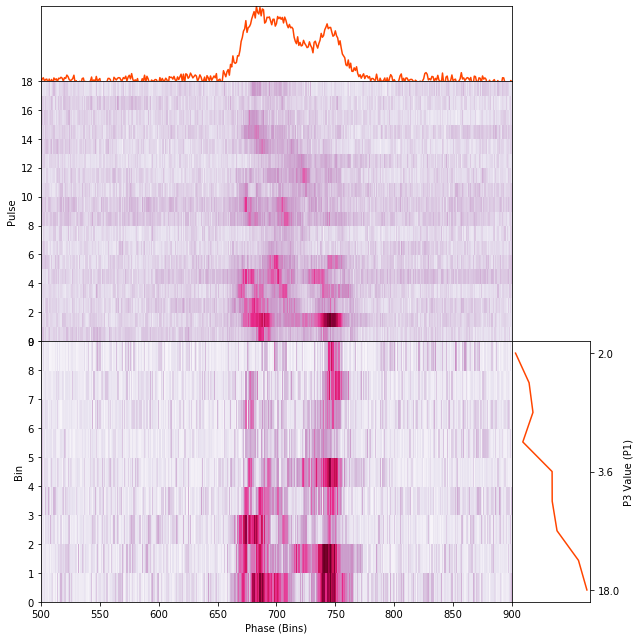

(0, 229, 246, 18, 'D')
The P3 value occurs in bin: 1
The P3 value is: 18.0 P1


In [58]:
burst_data=[]
lrfs_data_T=[]
ave_burst =np.zeros(1024)
ave_lrfs =[]
for b in range(s_burst[1],s_burst[2]+1):
    pulse_data=np.array([], dtype=fulldatatype)
    s = current_file['pulse'] == b
    pulse_data = np.append(pulse_data,current_file[s])
        
    y=np.array(pulse_data['intensity'])
        
    ave_burst = ave_burst+y
    burst_data.append(list(y))
    
if bf!=0:
    for b2 in range(s_burst2[1],s_burst2[2]+1):
        pulse_data=np.array([], dtype=fulldatatype)
        s = current_file2['pulse'] == b2
        pulse_data = np.append(pulse_data,current_file2[s])  
        
        y=np.array(pulse_data['intensity'])
      
        ave_burst = ave_burst+y
        burst_data.append(list(y))  
        
            
for d,num in enumerate(ave_burst):
    ave_burst[d]=num/int(len(burst_data))   
        
burst_data_T=[*zip(*burst_data)]
        
for col in burst_data_T:
    fft=np.fft.rfft(col)
    fft_abs=abs(fft)
    lrfs_data_T.append(list(fft_abs))
            
lrfs_data=[*zip(*lrfs_data_T)]
del lrfs_data[0]
    
for e,num in enumerate(lrfs_data):
    average=sum(num[500:900])/(len(num[500:900])+1)
    ave_lrfs.append(sum(num[500:900]))
    
if s_burst[4]=='A':
    cl='lightseagreen'
elif s_burst[4]=='B':
    cl='forestgreen'
elif s_burst[4]=='C':
    cl='magenta'
elif s_burst[4]=='D':
    cl='orangered'
else:
    cl='black'
        
fig = plt.figure(figsize=(9, 9))
grid = plt.GridSpec(16, 7, wspace=0, hspace=0)
    
ave_plt=plt.subplot(grid[0:2,0:6])
ave_plt.set_xticks([])
ave_plt.set_yticks([])
burst_plt=plt.subplot(grid[2:9,0:6])
burst_plt.set_xticks([])
lrfs_plt=plt.subplot(grid[9:16,0:6])
lrfsa_plt=plt.subplot(grid[9:16,6:7]);
lrfsa_plt.set_xticks([])
         
ave_plt.plot(ave_burst, color=cl)  
ave_plt.axis([500,900,0,max(ave_burst)])
    

lrfs_x=list(range(len(ave_lrfs)))    
for val in list(range(len(ave_lrfs))):
    lrfs_x[val]=len(burst_data)/(val+1)         
lrfs_x=[round(num,2) for num in lrfs_x]
lrfsa_plt.plot(ave_lrfs,list(range(len(ave_lrfs))),color=cl)
#plt.yticks(list(range(len(ave_lrfs))), lrfs_x)
lrfsa_plt.yaxis.tick_right()

lrfsx2=[]
tickrange=[]
for v in list(range(len(ave_lrfs)))[::4]:
    tickrange.append(v)
    lrfsx2.append(lrfs_x[v])
    
plt.yticks(tickrange, lrfsx2)
    
burst_plt.pcolormesh(burst_data, cmap='PuRd')
burst_plt.axis([500,900,0,len(burst_data)])
            
lrfs_plt.pcolormesh(lrfs_data, cmap='PuRd')
lrfs_plt.axis([500,900,0,len(lrfs_data)])

burst_plt.set_ylabel('Pulse')
lrfs_plt.set_ylabel('Bin')
lrfs_plt.set_xlabel('Phase (Bins)')
lrfsa_plt.yaxis.set_label_position("right")
lrfsa_plt.set_ylabel('P3 Value (P1)')
plt.tight_layout()
plt.savefig('burst/B68-edit')
plt.show()
    
l_max=max(ave_lrfs)
l_ind=ave_lrfs.index(l_max)+1
#l_ind=2
p3=(int(len(burst_data)))/(l_ind)
print(s_burst)
print('The P3 value occurs in bin:',l_ind)
print('The P3 value is:', p3, 'P1')

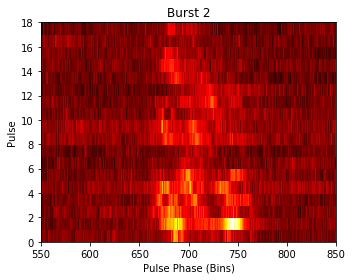

In [59]:
plt.figure(figsize=(5, 4))
plt.pcolormesh(burst_data, cmap='hot')
plt.axis([550,850,0,len(burst_data)])
plt.xlabel('Pulse Phase (Bins)')
plt.ylabel('Pulse')
plt.title('Burst 2')
plt.tight_layout()
plt.savefig('png/b2')

### FULL FILE

In [90]:
s_burst=(2, 0, 249, 250, 'D')

In [91]:
burst_data=[]
lrfs_data_T=[]
ave_burst =np.zeros(1024)
ave_lrfs =[]
for b in range(s_burst[1],s_burst[2]+1):
    pulse_data=np.array([], dtype=fulldatatype)
    s = current_file['pulse'] == b
    pulse_data = np.append(pulse_data,current_file[s])
        
    y=np.array(pulse_data['intensity'])
        
    ave_burst = ave_burst+y
    burst_data.append(list(y))

[550, 850, 0, 250]

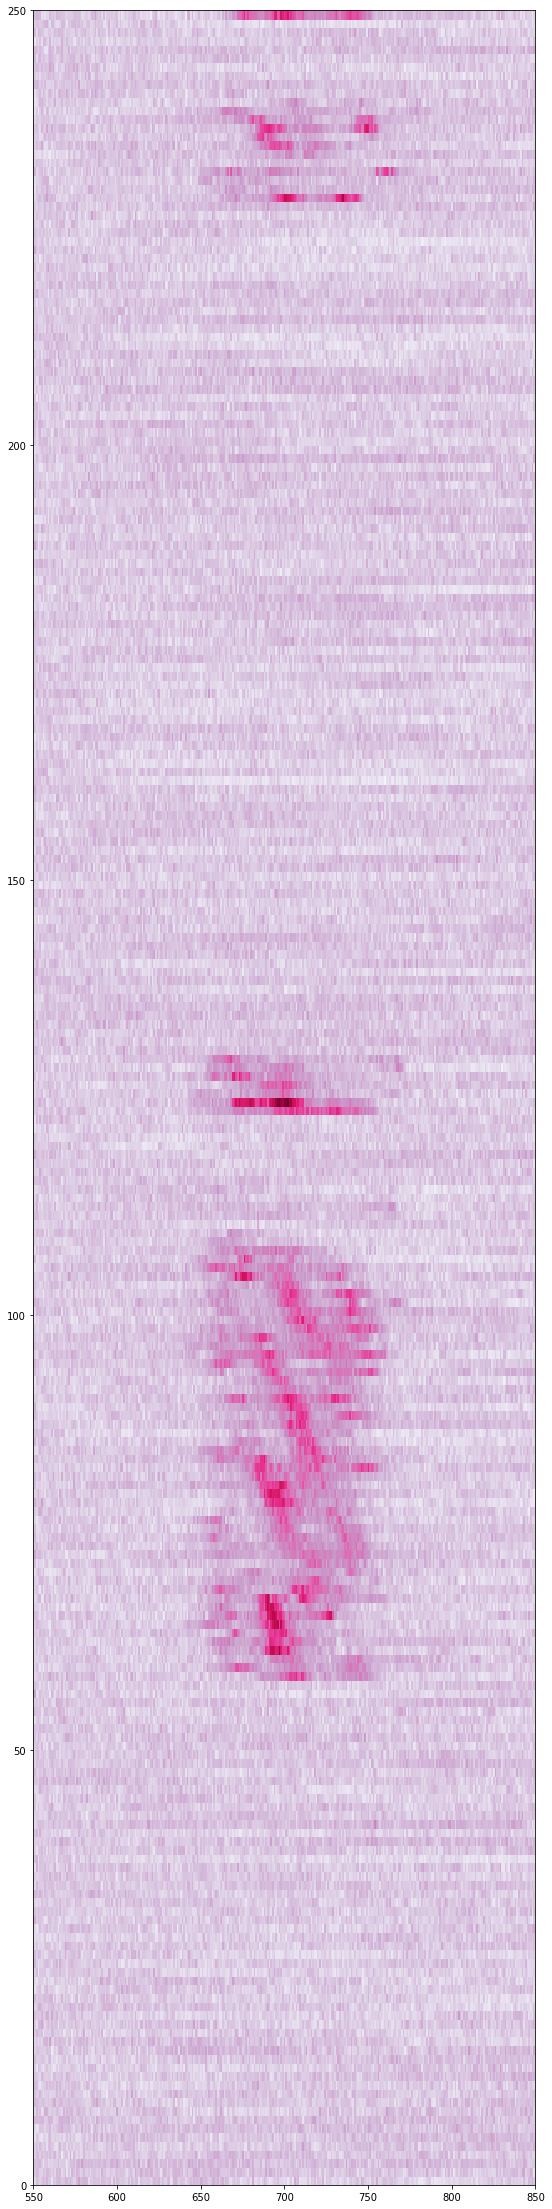

In [92]:
plt.figure(figsize=(9, 40))
plt.pcolormesh(burst_data, cmap='PuRd')
plt.axis([550,850,0,len(burst_data)])

File: 0 ../Parkes_archive_files/4500nsub\2019-11-20-045757.paz.pazi.Fp.pdv
File: 1 ../Parkes_archive_files/4500nsub\2019-11-20-045947.paz.pazi.Fp.pdv
File: 2 ../Parkes_archive_files/4500nsub\2019-11-20-050137.paz.pazi.Fp.pdv
File: 3 ../Parkes_archive_files/4500nsub\2019-11-20-050327.paz.pazi.Fp.pdv
File: 4 ../Parkes_archive_files/4500nsub\2019-11-20-050518.paz.pazi.Fp.pdv
File: 5 ../Parkes_archive_files/4500nsub\2019-11-20-050708.paz.pazi.Fp.pdv
File: 6 ../Parkes_archive_files/4500nsub\2019-11-20-050858.paz.pazi.Fp.pdv
File: 7 ../Parkes_archive_files/4500nsub\2019-11-20-051048.paz.pazi.Fp.pdv
File: 8 ../Parkes_archive_files/4500nsub\2019-11-20-051238.paz.pazi.Fp.pdv
File: 9 ../Parkes_archive_files/4500nsub\2019-11-20-051428.paz.pazi.Fp.pdv
File: 10 ../Parkes_archive_files/4500nsub\2019-11-20-051618.paz.pazi.Fp.pdv
File: 11 ../Parkes_archive_files/4500nsub\2019-11-20-051809.paz.pazi.Fp.pdv
File: 12 ../Parkes_archive_files/4500nsub\2019-11-20-051959.paz.pazi.Fp.

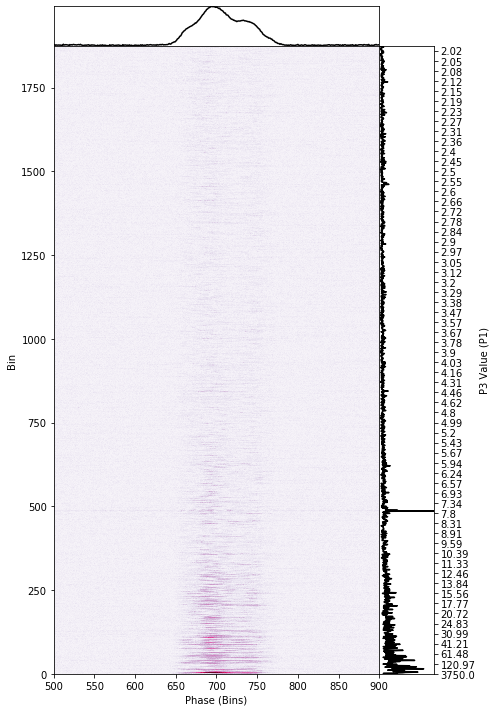

(14, 244, 249, 6, 'D')
The P3 value occurs in bin: 487
The P3 value is: 7.700205338809035 P1


In [15]:
burst_data=[]
lrfs_data_T=[]
ave_burst =np.zeros(1024)
ave_lrfs =[]
    
for a in list(range(0,15)):

    print('File:', a , file_names[a])
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
    n = mode_class['mode'] != 'O'
    p = np.logical_and(f,n)
    bursts = mode_class[p]
    
    for s_burst in bursts:
        
        for b in range(s_burst[1],s_burst[2]+1):
            pulse_data=np.array([], dtype=fulldatatype)
            s = current_file['pulse'] == b
            pulse_data = np.append(pulse_data,current_file[s])

            y=np.array(pulse_data['intensity'])

            ave_burst = ave_burst+y
            burst_data.append(list(y))


for d,num in enumerate(ave_burst):
    ave_burst[d]=num/int(len(burst_data))   

burst_data_T=[*zip(*burst_data)]

for col in burst_data_T:
    fft=np.fft.rfft(col)
    fft_abs=abs(fft)
    lrfs_data_T.append(list(fft_abs))

lrfs_data=[*zip(*lrfs_data_T)]
del lrfs_data[0]

for e,num in enumerate(lrfs_data):
    average=sum(num[500:900])/(len(num[500:900])+1)
    ave_lrfs.append(sum(num[500:900]))
    
cl='black'
        
fig = plt.figure(figsize=(7, 10))
grid = plt.GridSpec(17, 7, wspace=0, hspace=0)
    
ave_plt=plt.subplot(grid[0:1,0:6])
ave_plt.set_xticks([])
ave_plt.set_yticks([])
#burst_plt=plt.subplot(grid[1:5,0:6])
#burst_plt.set_xticks([])
lrfs_plt=plt.subplot(grid[1:17,0:6])
lrfsa_plt=plt.subplot(grid[1:17,6:7])
#lrfs_plt=plt.subplot(grid[5:17,0:6])
#lrfsa_plt=plt.subplot(grid[5:17,6:7])
lrfsa_plt.set_xticks([])
         
ave_plt.plot(ave_burst, color=cl)  
ave_plt.axis([500,900,0,max(ave_burst)])
    

lrfs_x=list(range(len(ave_lrfs)))    
for val in list(range(len(ave_lrfs))):
    lrfs_x[val]=len(burst_data)/(val+1)         
lrfs_x=[round(num,2) for num in lrfs_x]
lrfsa_plt.plot(ave_lrfs,list(range(len(ave_lrfs))),color=cl)
#plt.yticks(list(range(len(ave_lrfs))), lrfs_x)
lrfsa_plt.yaxis.tick_right()
lrfsa_plt.axis([min(ave_lrfs)-5,max(ave_lrfs)+5,0,len(ave_lrfs)])

lrfsx2=[]
tickrange=[]
for v in list(range(len(ave_lrfs)))[::30]:
    tickrange.append(v)
    lrfsx2.append(lrfs_x[v])
    
plt.yticks(tickrange, lrfsx2)
    
#burst_plt.pcolormesh(burst_data, cmap='PuRd')
#burst_plt.axis([500,900,0,len(burst_data)])
            
lrfs_plt.pcolormesh(lrfs_data, cmap='PuRd')
lrfs_plt.axis([500,900,0,len(lrfs_data)])

#burst_plt.set_ylabel('Pulse')
lrfs_plt.set_ylabel('Bin')
lrfs_plt.set_xlabel('Phase (Bins)')
lrfsa_plt.yaxis.set_label_position("right")
lrfsa_plt.set_ylabel('P3 Value (P1)')
plt.tight_layout()
plt.savefig('png/full_lrfs')
plt.show()
    
l_max=max(ave_lrfs)
l_ind=ave_lrfs.index(l_max)+1
#l_ind=2
p3=(int(len(burst_data)))/(l_ind)
print(s_burst)
print('The P3 value occurs in bin:',l_ind)
print('The P3 value is:', p3, 'P1')

File: 0 ../Parkes_archive_files/4500nsub\2019-11-20-045757.paz.pazi.Fp.pdv
File: 1 ../Parkes_archive_files/4500nsub\2019-11-20-045947.paz.pazi.Fp.pdv
File: 2 ../Parkes_archive_files/4500nsub\2019-11-20-050137.paz.pazi.Fp.pdv
File: 3 ../Parkes_archive_files/4500nsub\2019-11-20-050327.paz.pazi.Fp.pdv
File: 4 ../Parkes_archive_files/4500nsub\2019-11-20-050518.paz.pazi.Fp.pdv
File: 5 ../Parkes_archive_files/4500nsub\2019-11-20-050708.paz.pazi.Fp.pdv
File: 6 ../Parkes_archive_files/4500nsub\2019-11-20-050858.paz.pazi.Fp.pdv
File: 7 ../Parkes_archive_files/4500nsub\2019-11-20-051048.paz.pazi.Fp.pdv
File: 8 ../Parkes_archive_files/4500nsub\2019-11-20-051238.paz.pazi.Fp.pdv
File: 9 ../Parkes_archive_files/4500nsub\2019-11-20-051428.paz.pazi.Fp.pdv
File: 10 ../Parkes_archive_files/4500nsub\2019-11-20-051618.paz.pazi.Fp.pdv
File: 11 ../Parkes_archive_files/4500nsub\2019-11-20-051809.paz.pazi.Fp.pdv
File: 12 ../Parkes_archive_files/4500nsub\2019-11-20-051959.paz.pazi.Fp.

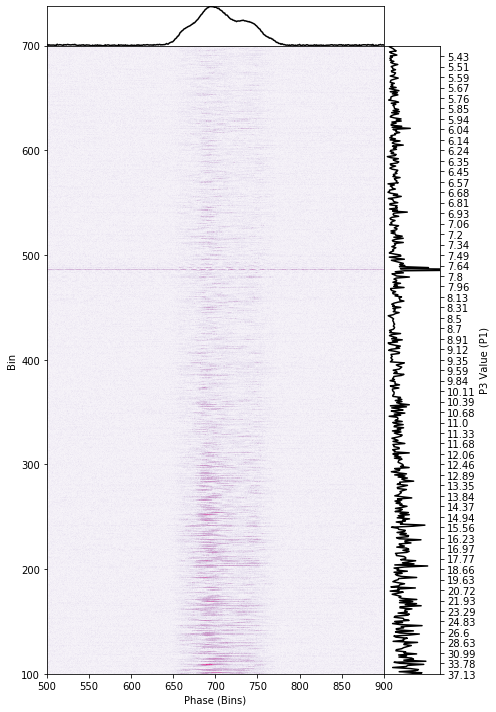

(14, 244, 249, 6, 'D')
The P3 value occurs in bin: 487
The P3 value is: 7.700205338809035 P1


In [18]:
burst_data=[]
lrfs_data_T=[]
ave_burst =np.zeros(1024)
ave_lrfs =[]
    
for a in list(range(0,15)):

    print('File:', a , file_names[a])
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
    n = mode_class['mode'] != 'O'
    p = np.logical_and(f,n)
    bursts = mode_class[p]
    
    for s_burst in bursts:
        
        for b in range(s_burst[1],s_burst[2]+1):
            pulse_data=np.array([], dtype=fulldatatype)
            s = current_file['pulse'] == b
            pulse_data = np.append(pulse_data,current_file[s])

            y=np.array(pulse_data['intensity'])

            ave_burst = ave_burst+y
            burst_data.append(list(y))


for d,num in enumerate(ave_burst):
    ave_burst[d]=num/int(len(burst_data))   

burst_data_T=[*zip(*burst_data)]

for col in burst_data_T:
    fft=np.fft.rfft(col)
    fft_abs=abs(fft)
    lrfs_data_T.append(list(fft_abs))

lrfs_data=[*zip(*lrfs_data_T)]
del lrfs_data[0]

for e,num in enumerate(lrfs_data):
    average=sum(num[500:900])/(len(num[500:900])+1)
    ave_lrfs.append(sum(num[500:900]))
    
cl='black'
        
fig = plt.figure(figsize=(7, 10))
grid = plt.GridSpec(17, 7, wspace=0, hspace=0)
    
ave_plt=plt.subplot(grid[0:1,0:6])
ave_plt.set_xticks([])
ave_plt.set_yticks([])
#burst_plt=plt.subplot(grid[1:5,0:6])
#burst_plt.set_xticks([])
lrfs_plt=plt.subplot(grid[1:17,0:6])
lrfsa_plt=plt.subplot(grid[1:17,6:7])
#lrfs_plt=plt.subplot(grid[5:17,0:6])
#lrfsa_plt=plt.subplot(grid[5:17,6:7])
lrfsa_plt.set_xticks([])
         
ave_plt.plot(ave_burst, color=cl)  
ave_plt.axis([500,900,0,max(ave_burst)])
    

lrfs_x=list(range(len(ave_lrfs)))    
for val in list(range(len(ave_lrfs))):
    lrfs_x[val]=len(burst_data)/(val+1)         
lrfs_x=[round(num,2) for num in lrfs_x]
lrfsa_plt.plot(ave_lrfs,list(range(len(ave_lrfs))),color=cl)
#plt.yticks(list(range(len(ave_lrfs))), lrfs_x)
lrfsa_plt.yaxis.tick_right()
lrfsa_plt.axis([min(ave_lrfs)-5,max(ave_lrfs)/2,100,700])

lrfsx2=[]
tickrange=[]
for v in list(range(len(ave_lrfs)))[100:700:10]:
    tickrange.append(v)
    lrfsx2.append(lrfs_x[v])
    
plt.yticks(tickrange, lrfsx2)
    
#burst_plt.pcolormesh(burst_data, cmap='PuRd')
#burst_plt.axis([500,900,0,len(burst_data)])
            
lrfs_plt.pcolormesh(lrfs_data, cmap='PuRd')
lrfs_plt.axis([500,900,100,700])

#burst_plt.set_ylabel('Pulse')
lrfs_plt.set_ylabel('Bin')
lrfs_plt.set_xlabel('Phase (Bins)')
lrfsa_plt.yaxis.set_label_position("right")
lrfsa_plt.set_ylabel('P3 Value (P1)')
plt.tight_layout()
plt.savefig('png/full_lrfs_zoom')
plt.show()
    
l_max=max(ave_lrfs)
l_ind=ave_lrfs.index(l_max)+1
#l_ind=2
p3=(int(len(burst_data)))/(l_ind)
print(s_burst)
print('The P3 value occurs in bin:',l_ind)
print('The P3 value is:', p3, 'P1')